# Welcome to my k-Means clustering practice!

##### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans

##### Generating and visualizing data points

Text(0.5,1,'Five Clusters')

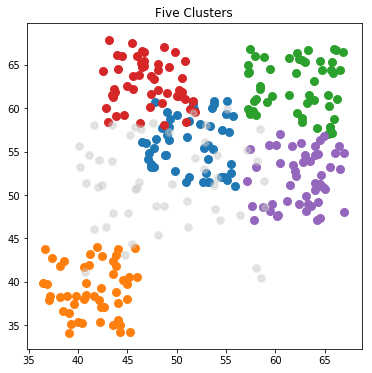

In [2]:
np.random.seed(7)
fig = plt.figure(figsize=(6, 6))
coordinates = np.random.uniform(45, 55, 10000)
df = pd.DataFrame()
for letter in ['a', 'b', 'c', 'd', 'e']:
    letter = pd.DataFrame([np.random.choice(coordinates, 50) + np.random.randint(-20, 20), 
                           np.random.choice(coordinates, 50) + np.random.randint(-20, 20)]).T 
    letter.columns = ['X', 'Y']
    plt.scatter(letter.iloc[:, 0], letter.iloc[:, 1], linewidths='3')
    df = pd.concat([df, letter], axis=0, sort=False)
test_points = pd.DataFrame([np.random.uniform(40, 60, 50), 
                           np.random.uniform(40, 60, 50)]).T
plt.scatter(test_points.iloc[:, 0], test_points.iloc[:, 1], color='#C9C9C9', linewidths='3', alpha=0.4)
plt.title('Five Clusters')

The grey points will be the test data; we will try to predict which category they'd belong to.

##### Getting all the points into a dataframe (excluding the test points), and shuffling

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X,Y
0,61.205766,49.339097
1,43.105341,67.811954
2,50.920045,58.413441
3,47.150623,54.808503
4,53.134084,55.786987


In [4]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.labels_

array([4, 2, 3, 3, 3, 2, 0, 1, 3, 0, 0, 3, 1, 0, 0, 3, 1, 4, 0, 3, 0, 3,
       4, 1, 2, 3, 4, 2, 0, 1, 1, 0, 1, 4, 3, 3, 2, 1, 0, 3, 1, 1, 4, 4,
       0, 2, 0, 0, 4, 4, 1, 0, 2, 4, 2, 3, 0, 4, 0, 4, 0, 4, 1, 2, 3, 1,
       0, 0, 2, 3, 4, 3, 4, 1, 2, 3, 3, 2, 4, 1, 0, 0, 0, 3, 0, 2, 2, 2,
       4, 4, 4, 4, 3, 1, 3, 4, 0, 4, 2, 3, 4, 1, 0, 3, 2, 3, 0, 4, 3, 1,
       1, 2, 1, 4, 3, 1, 0, 1, 0, 1, 1, 3, 3, 0, 3, 2, 2, 0, 2, 4, 0, 1,
       2, 0, 2, 2, 2, 1, 2, 0, 4, 2, 1, 1, 3, 2, 2, 2, 4, 1, 3, 0, 2, 1,
       2, 2, 0, 3, 3, 4, 3, 2, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 2, 4, 3, 0,
       0, 2, 1, 4, 4, 3, 0, 1, 2, 0, 4, 2, 2, 3, 3, 4, 4, 4, 0, 0, 2, 1,
       4, 3, 4, 1, 3, 1, 4, 3, 1, 2, 1, 3, 3, 3, 4, 3, 1, 1, 1, 1, 1, 3,
       4, 0, 1, 4, 3, 4, 2, 3, 4, 3, 3, 3, 0, 1, 2, 0, 0, 2, 4, 3, 3, 2,
       3, 0, 1, 0, 2, 4, 2, 1])

In [5]:
df['labels'] = kmeans.labels_
df.head()

,X,Y,labels
0,61.205766,49.339097,4
1,43.105341,67.811954,2
2,50.920045,58.413441,3
3,47.150623,54.808503,3
4,53.134084,55.786987,3


##### Getting the predictions of the test points

In [6]:
test_points.head()

,0,1
0,58.176029,53.957570
1,41.622782,46.042960
2,42.096267,54.018542
3,54.346088,47.125395
4,56.379673,47.664904


##### Plotting the graph, with the (transparent) test points 

Text(0.5,1,'Five Clusters With Transparent Test Points')

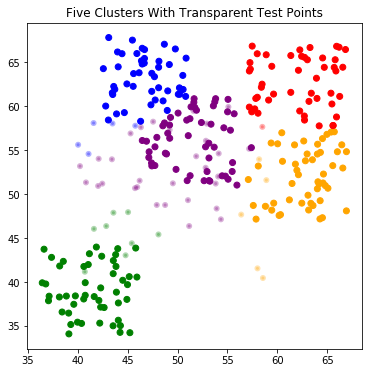

In [7]:
x = df.X
y = df.Y
label = df.labels
colors = ['red','green','blue','purple', 'orange']
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=label, cmap=clrs.ListedColormap(colors))
plt.scatter(test_points.iloc[:, 0], test_points.iloc[:, 1], c=kmeans.predict(test_points), 
            cmap=clrs.ListedColormap(colors), alpha=0.3, linewidths=3, marker='.')
plt.title('Five Clusters With Transparent Test Points')

Success! The k-Means algorithm fit the test data in relevant groups

### Now let's do it in 3d

In [8]:
np.random.seed(8)
coordinates = np.random.uniform(45, 55, 10000)
df = pd.DataFrame()
for letter in ['a', 'b', 'c', 'd', 'e']:
    letter = pd.DataFrame([np.random.choice(coordinates, 50) + np.random.randint(-20, 20), 
                           np.random.choice(coordinates, 50) + np.random.randint(-20, 20),
                           np.random.choice(coordinates, 50) + np.random.randint(-20, 20)]).T 
    df = pd.concat([df, letter], axis=0, sort=False)
df = df.astype(float)

In [9]:
x = np.array(df.iloc[:, 0].astype(np.float64))
y = np.array(df.iloc[:, 1].astype(np.float64))
z = np.array(df.iloc[:, 2].astype(np.float64))
xyz = np.column_stack([x, y, z])
xyz[:10]

array([[59.49775294, 58.82552034, 32.18759619],
       [56.01535435, 62.53756628, 30.4673095 ],
       [59.71753767, 66.83725316, 29.71408573],
       [61.43490963, 59.09414848, 31.23556261],
       [62.91598224, 58.59378366, 38.85738599],
       [62.1014843 , 61.67570538, 36.7089124 ],
       [57.18974497, 66.59182919, 34.91772263],
       [60.28203518, 63.41377261, 36.20924467],
       [60.67639184, 60.50885743, 35.64868665],
       [56.70272525, 66.09888405, 34.20769738]])

In [10]:
test_x = np.random.uniform(40, 60, 50)
test_y = np.random.uniform(40, 60, 50)
test_z = np.random.uniform(40, 60, 50)
test_xyz = np.column_stack([test_x, test_y, test_z])
test_xyz[:10]

array([[46.55781309, 52.48573421, 43.39046807],
       [40.62408929, 54.82948864, 43.93742857],
       [54.80933128, 49.11602822, 48.08529779],
       [43.04032912, 54.58192648, 57.70346228],
       [41.49441704, 54.24708166, 46.25068843],
       [53.1124492 , 56.89456322, 42.65894765],
       [53.3105623 , 41.28387047, 57.78957303],
       [56.95137127, 52.16610179, 53.58603214],
       [45.563599  , 58.14877885, 45.06074687],
       [48.80203103, 56.91200725, 58.80014631]])

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(xyz)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

<Figure size 432x288 with 0 Axes>

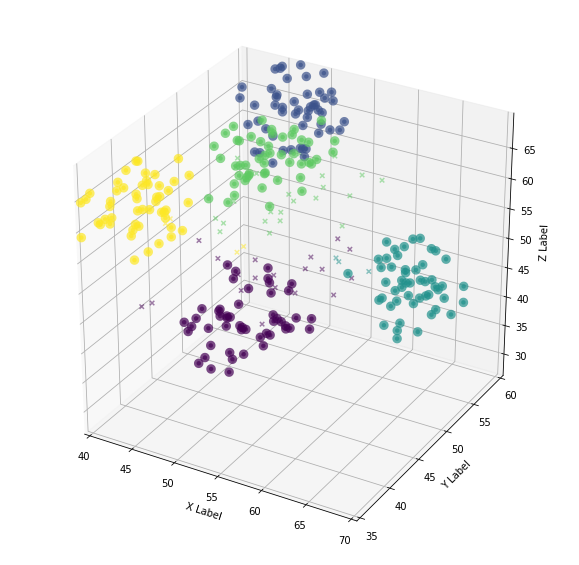

In [19]:
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_, linewidths=5, alpha=.7)
ax.scatter(test_x, test_y, test_z, c=kmeans.predict(test_xyz), alpha=0.5, linewidths=8, marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.xlim(40, 70)
plt.ylim(35, 60)
plt.show()

Success! The k-Means algorithm fit the test data in relevant groups in 3d too